# Árboles de Decisión: Introducción

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Los árboles de decisión son formas extremadamente intuitivas de clasificar o etiquetar objetos: basta con hacer una serie de preguntas diseñadas para acertar en la clasificación.

La división binaria hace que esto sea extremadamente eficiente: en un árbol bien construido, cada pregunta reducirá el número de opciones aproximadamente a la mitad, reduciendo muy rápidamente las opciones incluso entre un gran número de clases.

La clave está en decidir qué preguntas hacer en cada paso.
En las implementaciones de aprendizaje automático de los árboles de decisión, las preguntas suelen adoptar la forma de divisiones alineadas con el eje de los datos: es decir, cada nodo del árbol divide los datos en dos grupos utilizando un valor de corte dentro de una de las características.


### Creando un árbol de decisión

Considere los siguientes datos bidimensionales, que tienen una de cuatro etiquetas de clase:

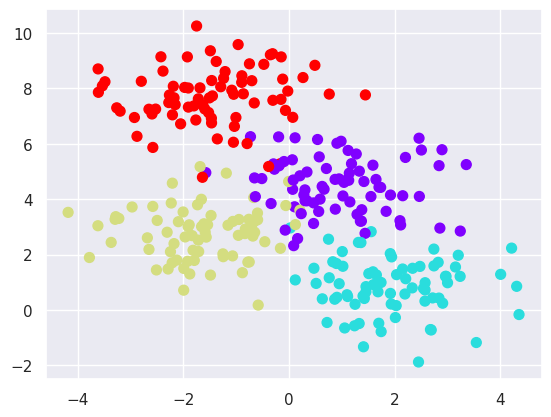

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

Un simple árbol de decisión construido sobre estos datos dividirá iterativamente los datos a lo largo de uno u otro eje según algún criterio cuantitativo, y en cada nivel asignará la etiqueta de la nueva región según una votación mayoritaria de los puntos que la componen.

Hay que tener en cuentra que tras la primera división, todos los puntos de la rama superior permanecen inalterados, por lo que no es necesario seguir subdividiendo esta rama.


Este proceso de ajuste de un árbol de decisión a nuestros datos se puede realizar en Scikit-Learn con ``DecisionTreeClassifier``

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

La siguiente función permite la visualización sencilla del clasificador

In [23]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    # Se asigna el objeto de ejes (ax) pasado como argumento, o se obtiene el
    # objeto de ejes actual (plt.gca()) si no se proporciona
    ax = ax or plt.gca()

    # Dibuja los puntos de entrenamiento
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')      # ajusta los ejes para que se ajusten a los datos
    ax.axis('off')        # apaga los ejes para mejorar la visualización
    xlim = ax.get_xlim()  # límites actuales del eje x
    ylim = ax.get_ylim()  # límites actuales del eje y

    model.fit(X, y)  # ajusta el estimador

    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Crea un diagrama de color con los resultados
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

El aspecto de la clasificación del árbol de decisión será el siguiente.

<ipython-input-23-2a2a0435bae3>:22: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


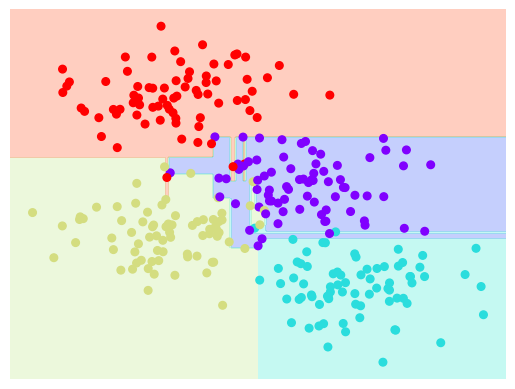

In [24]:
visualize_classifier(DecisionTreeClassifier(), X, y)

### Árboles de decisión y sobreaprendizaje

Es muy fácil profundizar demasiado en el árbol y, por tanto, ajustarse a los detalles de los datos particulares en lugar de a las propiedades generales de las distribuciones de las que se extraen.

Otra forma de ver este sobreajuste es observar los modelos entrenados en diferentes subconjuntos de los datos.

### Ejercicio:

Observar como afecta el parámetro *max_depth* en los resultados del árbol de decisión.